# Задача 5.1

Дана [выборка](data/regression.zip).

Выборка состоит из трех объектов: $X_{train}, Y_{train}, X_{test}$.

$Y_{train}$ — изображение (пиксель кодируется черно-белой компонентой изображения), $X_{train}$ — признаки, соответствующие этому изображению. Элемент $X_{i,j}$ соответствует набору признаков для пикселя $Y_{i,j}$.

**Требуется:**
1. Провести отбор наиболее значимых признаков и построить регрессию $X\rightarrow Y$.
2. Проинтерпетировать признаки: каждый признак является функцией, возможно нелинейной, от значения пикселя.
3. Получить изображение по $X_{test}$. Оцениваться будет качество полученного изображения. Ожидается, что регрессия на $X_{train}, Y_{train}$ даст $R^2 > 0.85$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.regression.linear_model import OLS
import seaborn as sns
import statsmodels.formula.api as smf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
!unzip data/regression.zip

Archive:  data/regression.zip
  inflating: regression_x_test.npy   
  inflating: regression_x_train.npy  
  inflating: regression_y_train.npy  


In [3]:
X_train = np.load('regression_x_train.npy')
Y_train = np.load('regression_y_train.npy')
X_test = np.load('regression_x_test.npy')

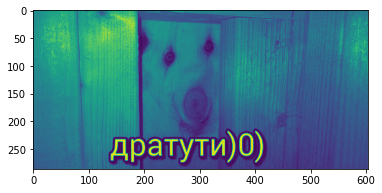

In [4]:
fig, ax = plt.subplots()

ax.imshow(Y_train)
plt.show()

In [24]:
X_train.shape

(286, 604, 35)

In [6]:
X_train = X_train.reshape(-1, 35)
Y_train = Y_train.reshape(-1)
X_test = X_test.reshape(-1, 35)

train_X = pd.DataFrame(X_train, columns = [i for i in range(1, 36)])
train_Y = pd.DataFrame({'label': Y_train})
test_X = pd.DataFrame(X_test, columns = [i for i in range(1, 36)])

In [32]:
model = OLS(Y_train, X_train)
results = model.fit()
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                   Results: Ordinary least squares
=====================================================================
Model:              OLS              Adj. R-squared:     0.681       
Dependent Variable: y                AIC:                -450943.7164
Date:               2021-04-05 19:47 BIC:                -450873.2994
No. Observations:   172744           Log-Likelihood:     2.2548e+05  
Df Model:           6                F-statistic:        6.157e+04   
Df Residuals:       172737           Prob (F-statistic): 0.00        
R-squared:          0.681            Scale:              0.0043032   
------------------------------------------------------------------------
         Coef.     Std.Err.        t        P>|t|      [0.025     0.975]
------------------------------------------------------------------------
x1      -0.0000      0.0000    -365.8890    0.0000    -0.0000    -0.0000
x2       0.0000      0.0000     340.4550    0.0000     0.0000     0.0000
x3       0.0000      0.0000     636.4109    0.0000     0.0000     0.0000
x4       0.0160      0.0004      42.0120    0.0000     0.0153     0.0168
x5       0.0133      0.0004      35.2427    0.0000     0.0126     0.0140
x6      -0.0000      0.0000    -533.4435    0.0000    -0.0000    -0.0000
x7       0.0000      0.0000     419.1360    0.0000     0.0000     0.0000
x8       0.0000      0.0000     589.1490    0.0000     0.0000     0.0000
x9       0.0160      0.0004      42.0018    0.0000     0.0153     0.0168
x10      0.0133      0.0004      35.2450    0.0000     0.0126     0.0140
x11      0.0000      0.0000      78.2926    0.0000     0.0000     0.0000
x12      0.0000      0.0000      78.2926    0.0000     0.0000     0.0000
x13      0.0000      0.0000      78.2926    0.0000     0.0000     0.0000
x14      0.0000      0.0000      78.2926    0.0000     0.0000     0.0000
x15      0.0002      0.0000     427.8505    0.0000     0.0002     0.0002
x16      0.0001      0.0000     427.8505    0.0000     0.0001     0.0001
x17      0.0005      0.0000     427.8505    0.0000     0.0005     0.0005
x18      0.0005      0.0000     427.8505    0.0000     0.0005     0.0005
x19      0.0000      0.0000     633.7603    0.0000     0.0000     0.0000
x20      0.0003      0.0000     633.7603    0.0000     0.0003     0.0003
x21      0.0008      0.0000     633.7603    0.0000     0.0008     0.0008
x22      0.0003      0.0000     633.7603    0.0000     0.0003     0.0004
x23     -0.0000      0.0000     -26.7821    0.0000    -0.0000    -0.0000
x24     -0.0000      0.0000     -26.7821    0.0000    -0.0000    -0.0000
x25     -0.0000      0.0000     -26.7821    0.0000    -0.0000    -0.0000
x26     -0.0000      0.0000     -26.7821    0.0000    -0.0000    -0.0000
x27     -0.0000      0.0000     -27.4594    0.0000    -0.0000    -0.0000
x28     -0.0000      0.0000     -27.4594    0.0000    -0.0000    -0.0000
x29     -0.0000      0.0000     -27.4594    0.0000    -0.0000    -0.0000
x30     -0.0000      0.0000     -27.4594    0.0000    -0.0000    -0.0000
x31     -0.0000      0.0000    -560.1116    0.0000    -0.0000    -0.0000
x32      0.0000      0.0000     560.1116    0.0000     0.0000     0.0000
x33     -0.0000      0.0000    -560.1116    0.0000    -0.0000    -0.0000
x34     -0.0000      0.0000    -560.1116    0.0000    -0.0000    -0.0000
x35      0.0000      0.0000     560.1116    0.0000     0.0000     0.0000
---------------------------------------------------------------------
Omnibus:          41294.228   Durbin-Watson:      0.632              
Prob(Omnibus):    0.000       Jarque-Bera (JB):   125232.942         
Skew:             1.237       Prob(JB):           0.000              
Kurtosis:         6.359       Condition No.:      6872955470556569600
=====================================================================
* The condition number is large (7e+18). This might indicate
strong multicollinearity or other numerical problems.
"""

**Круто, понятно, что ничего непонятно!**

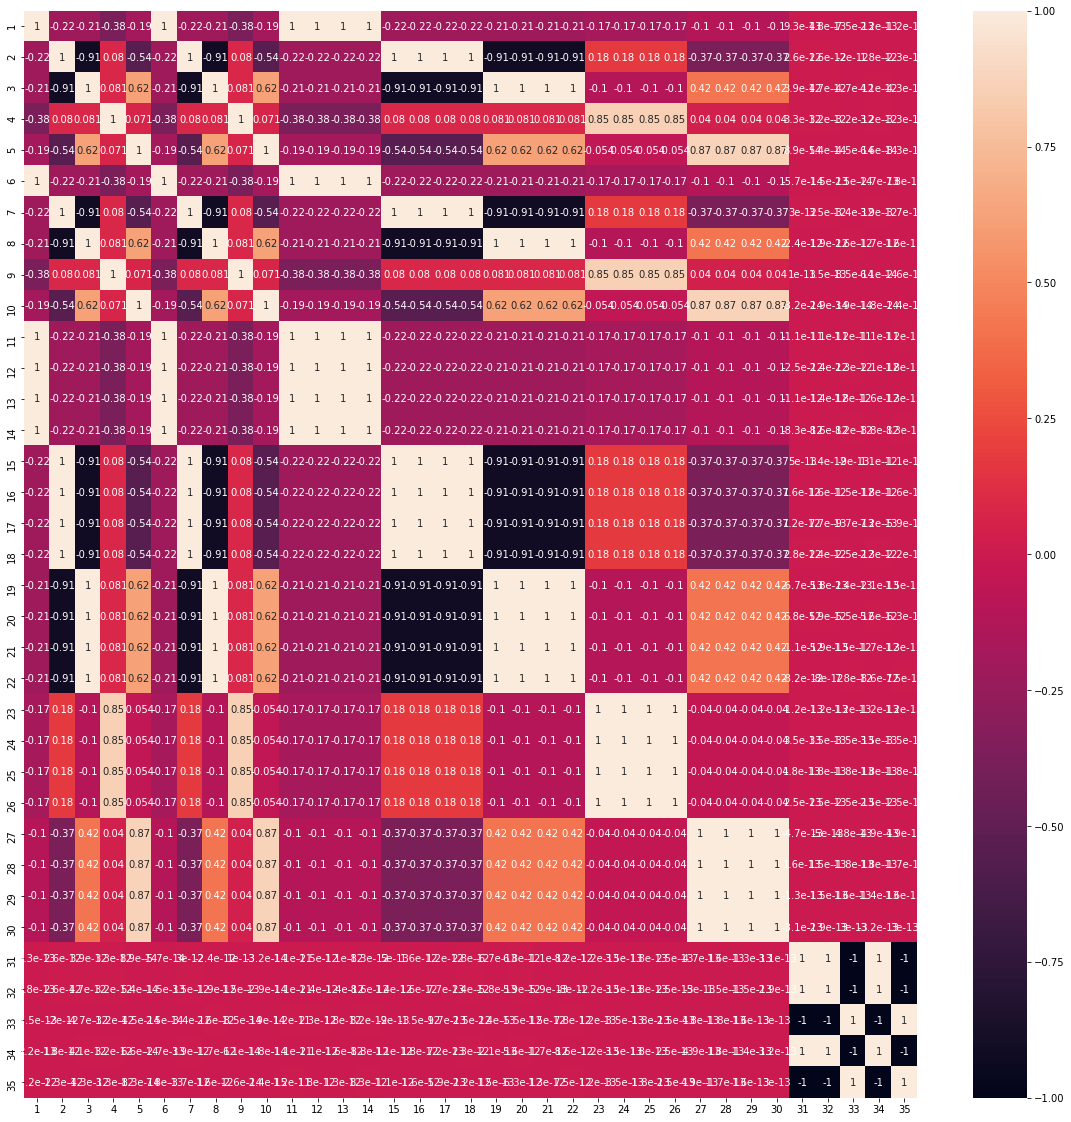

In [33]:
plt.figure(figsize=(20, 20))
_ = sns.heatmap(train_X.corr(), annot=True)

Значения нам тут не очень важны. Интересует, что много колонок дублируется (господи за что?). Итак, колонки под номерами: 12-14, 16-18, 20-22, 24-26, 28-30, 32, 34, 35 — удаляем. Они повторяются прям друг за другом.

А вот вначале еще повторения у вторых 5-ти колонок за первыми — нехорошо.

15-я за 2-ю, 19-я за 3-ю.

Итого остается:

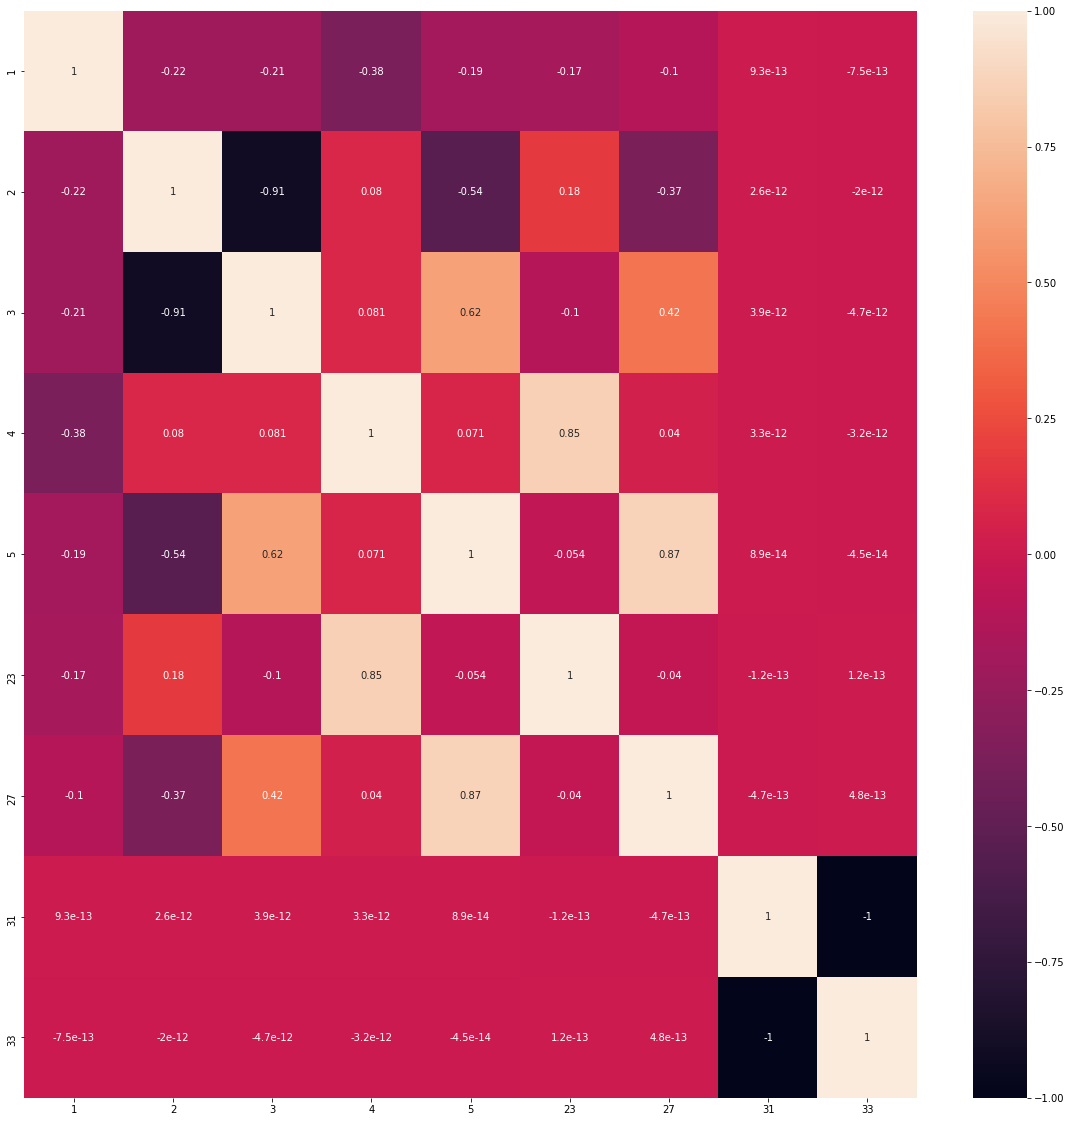

In [34]:
good = [1, 2, 3, 4, 5, 23, 27, 31, 33]
train_X = train_X[good]
plt.figure(figsize=(20, 20))
_ = sns.heatmap(train_X.corr(), annot=True)

In [35]:
train_X[good].sample(5)

,1,2,3,4,5,23,27,31,33
154584,0.496714,0.861736,0.647689,3.068788,-0.136049,14.112348,16.854108,-0.601707,-0.013497
144821,0.496714,0.861736,0.647689,1.587631,-0.136167,3.208789,16.852121,-0.601707,-0.013497
95050,0.496714,-0.138264,1.647689,2.274295,-0.226249,6.376108,15.400419,-0.601707,-0.013497
67052,0.496714,-0.138264,1.647689,2.292922,0.170317,6.495983,22.895956,-0.601707,-0.013497
99504,0.496714,0.861736,0.647689,1.956247,-0.088945,4.639051,17.667012,-0.601707,-0.013497


Добрые люди посоветовали взглянуть еще на значения — оказывается у последних двух колонок оно вообще единственное на колонку $\rightarrow$ такая себе информативность.

In [36]:
train_X[31].unique()

array([-0.60170661])

In [37]:
train_X[33].unique()

array([-0.01349722])

In [38]:
train_X[5].unique()

array([ 0.85943114, -0.07966015,  1.24361355, ..., -0.18395102,
       -0.16272399, -0.17112087])

Итого получаем, что:

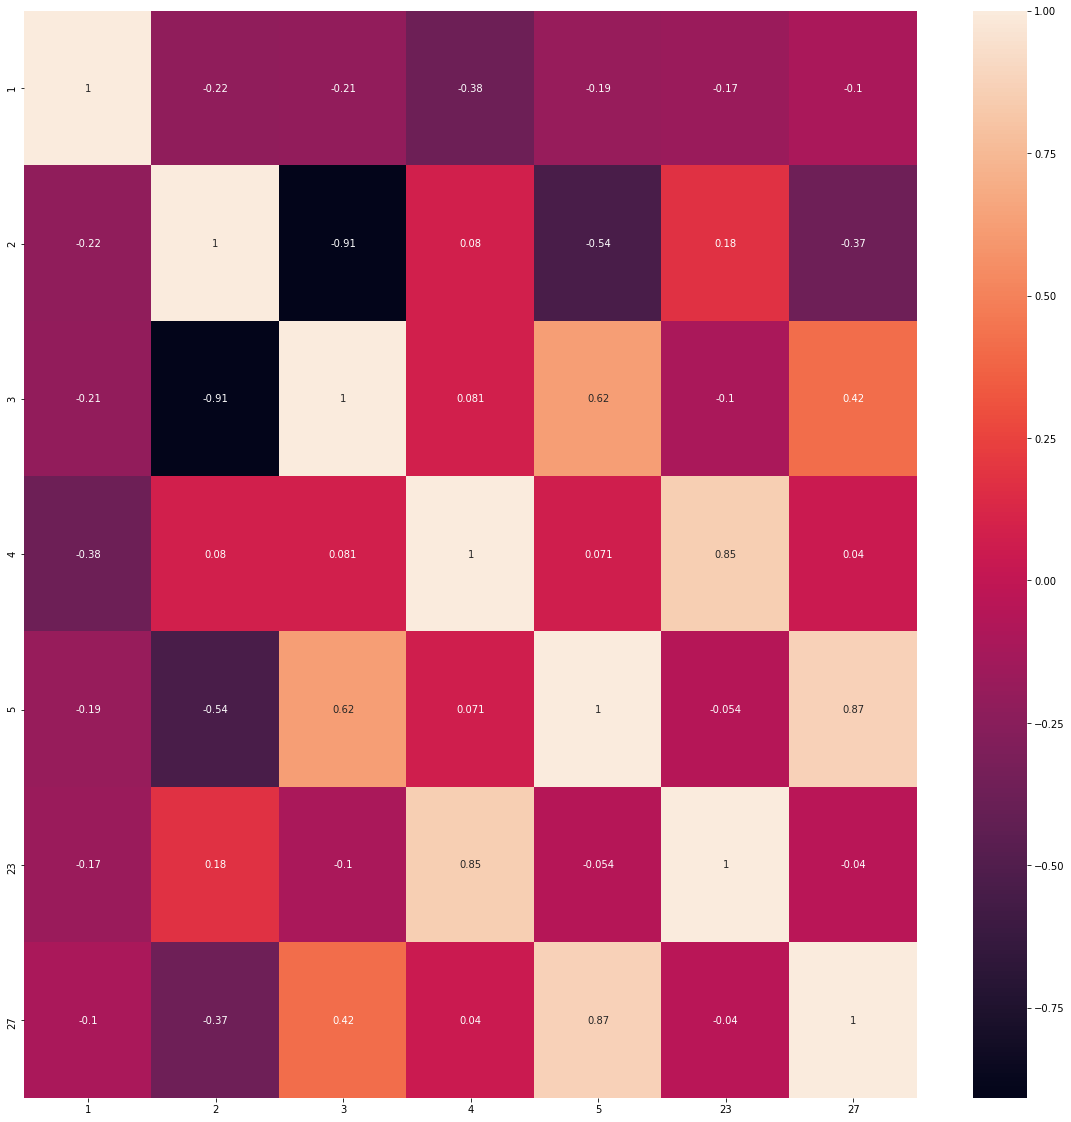

In [39]:
good = [1, 2, 3, 4, 5, 23, 27]
train_X = train_X[good]
plt.figure(figsize=(20, 20))
_ = sns.heatmap(train_X.corr(), annot=True)

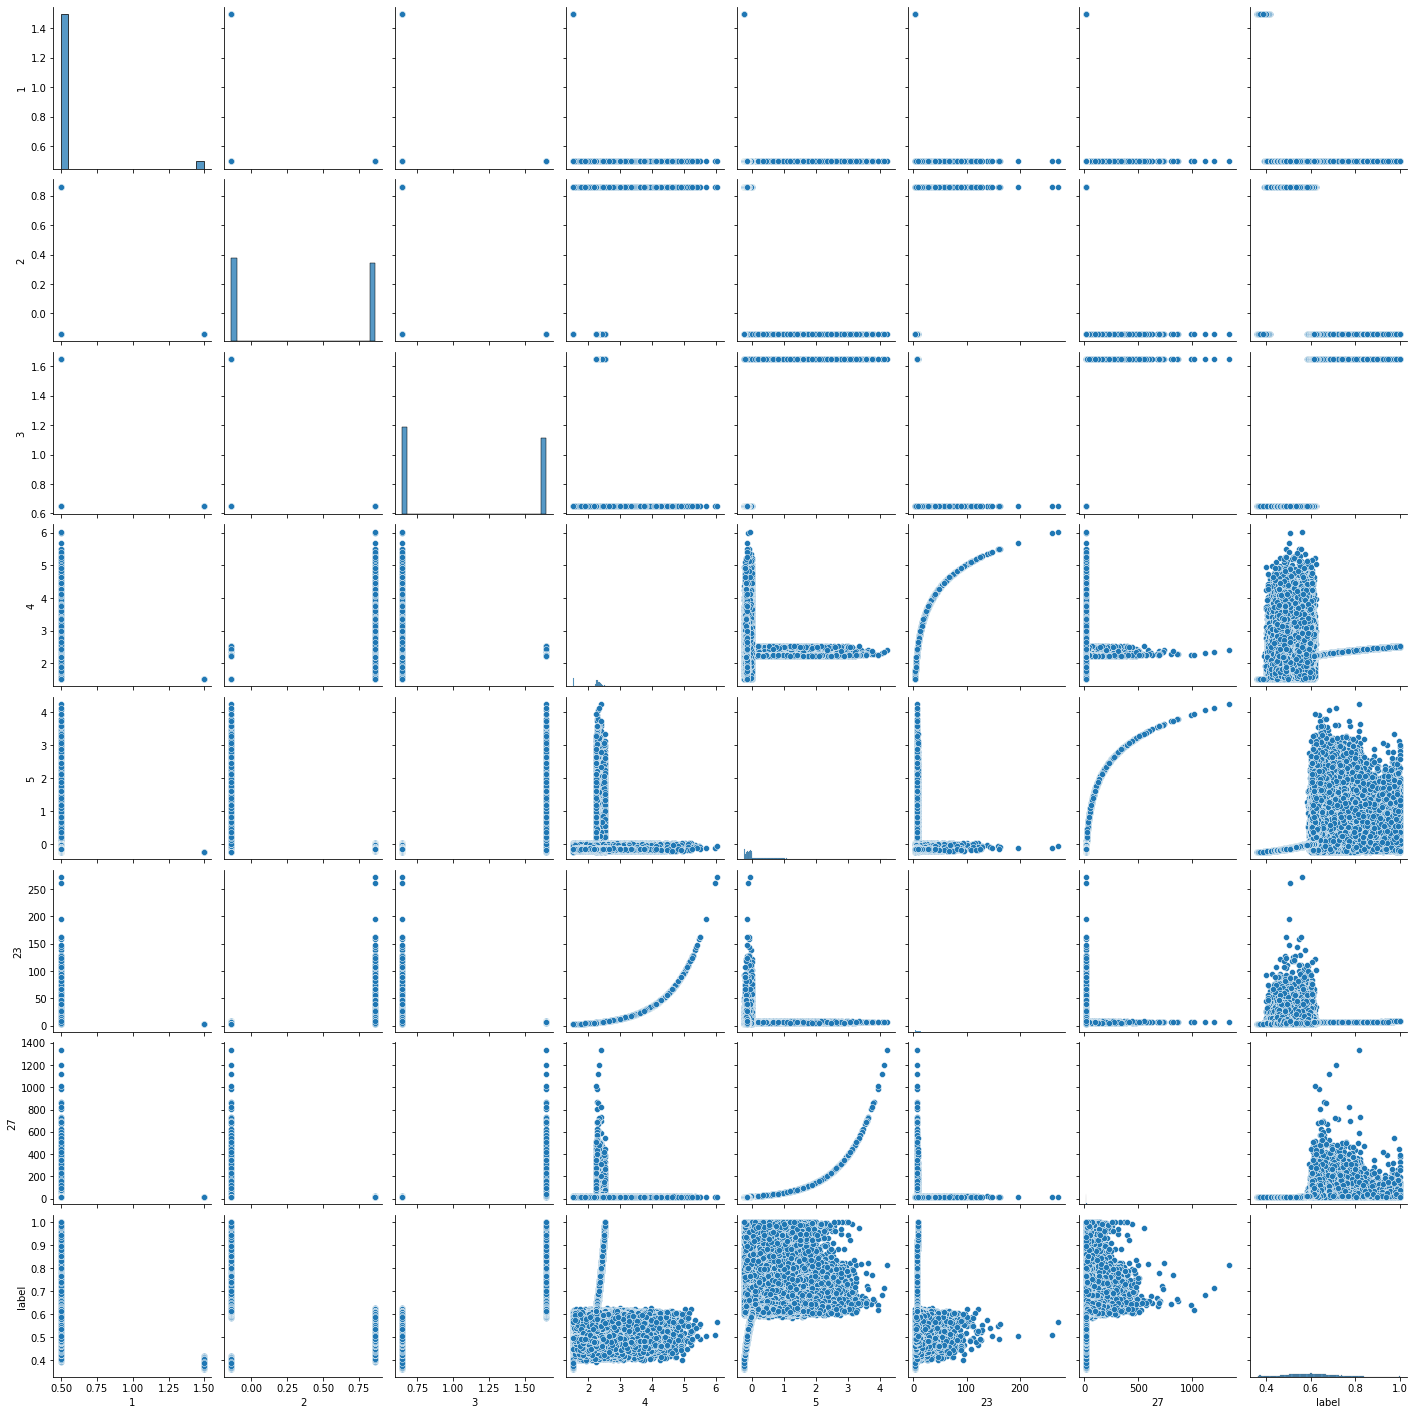

In [40]:
_ = sns.pairplot(pd.concat((train_X, train_Y), axis=1))

Графички на пересечении 5 и 27, а также 4 и 23 колонки свидетельствуют о некоторой зависимости меж признаками $\rightarrow$ удаляем последние две и оставляем первые 5 колонок.

In [7]:
good = [1, 2, 3, 4, 5]
X_train = train_X[good]
X_train.columns

Int64Index([1, 2, 3, 4, 5], dtype='int64')

In [9]:
X_train = train_X.rename(columns = {i: f'X{i}' for i in range(1, 6)})
model_new = smf.ols('label ~ X1 + X2 + X3 + X4 + X5', data=pd.concat((X_train, train_Y), axis=1)).fit()
model_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  label   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                 9.121e+04
Date:                Mon, 05 Apr 2021   Prob (F-statistic):               0.00
Time:                        20:32:09   Log-Likelihood:             2.2475e+05
No. Observations:              172744   AIC:                        -4.495e+05
Df Residuals:                  172739   BIC:                        -4.494e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2058      0.000    566.749      0.000       0.205       0.206
X1            -0.0092      0.001    -16.968      0.000      -0.010      -0.008
X2             0.1305      0.000    287.322      0.000       0.130       0.131
X3             0.2914      0.000    637.786      0.000       0.290       0.292
X4             0.0142      0.000     37.909      0.000       0.014       0.015
X5             0.0087      0.000     22.774      0.000       0.008       0.009
==============================================================================
Omnibus:                    40932.087   Durbin-Watson:                   0.621
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           122965.281
Skew:                           1.229   Prob(JB):                         0.00
Kurtosis:                       6.322   Cond. No.                     1.74e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.58e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Не будем отходить от привычки закидывать на шару $\rightarrow$ попробуем еще межфакторку.

In [19]:
X_train = train_X.rename(columns = {i: f'X{i}' for i in range(1, 6)})
model_new = smf.ols('label ~ X1 + X2 * X4 + X3 * X5', data=pd.concat((X_train, train_Y), axis=1)).fit()
model_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  label   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 3.631e+06
Date:                Mon, 05 Apr 2021   Prob (F-statistic):               0.00
Time:                        20:35:06   Log-Likelihood:             5.4518e+05
No. Observations:              172744   AIC:                        -1.090e+06
Df Residuals:                  172737   BIC:                        -1.090e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0914   9.13e-05   1000.329      0.000       0.091       0.092
X1            -0.2988      0.000  -1377.549      0.000      -0.299      -0.298
X2             1.6176      0.001   2448.764      0.000       1.616       1.619
X4             1.0599      0.000   2265.223      0.000       1.059       1.061
X2:X4         -1.2300      0.001  -2252.200      0.000      -1.231      -1.229
X3            -1.1355      0.001  -1845.142      0.000      -1.137      -1.134
X5             1.2385      0.001   1351.690      0.000       1.237       1.240
X3:X5         -0.7516      0.001  -1344.958      0.000      -0.753      -0.751
==============================================================================
Omnibus:                    28509.516   Durbin-Watson:                   1.238
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            97130.865
Skew:                           0.829   Prob(JB):                         0.00
Kurtosis:                       6.278   Cond. No.                     3.01e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.71e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Урааааа, почти полночь, а я сделал непонятно что...

Окей, методом тыка че-то вышло.

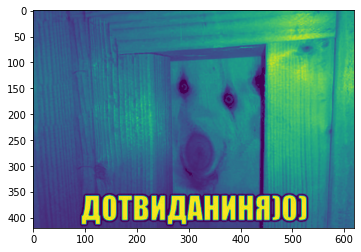

In [20]:
X_train = np.load('regression_x_train.npy')
Y_train = np.load('regression_y_train.npy')
X_test = np.load('regression_x_test.npy')

pred = model_new.predict(test_X.rename(columns = {i: f'X{i}' for i in range(1, 6)}))
test_Y = np.reshape(pred.values, (-1, X_test.shape[1]))

plt.imshow(test_Y)
plt.show()

Всем спокойной ночи!!!